In [147]:
import tensorflow as tf
import os
import glob
from tensorflow import keras
from tensorflow.keras.utils import load_img, img_to_array
import tensorflow.image as tfi
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Layer, Conv2D, MaxPooling2D, Dropout, UpSampling2D, Conv2DTranspose, concatenate, BatchNormalization, MaxPool2D, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard

In [5]:
!unzip /aiffel/aiffel/Main_Quest_2/images.zip -d /aiffel/aiffel/Main_Quest_2/

Archive:  /aiffel/aiffel/Main_Quest_2/images.zip
  inflating: /aiffel/aiffel/Main_Quest_2/images/night ride (10).png  
  inflating: /aiffel/aiffel/Main_Quest_2/images/night ride (10).png___fuse.png  
  inflating: /aiffel/aiffel/Main_Quest_2/images/night ride (10).png___save.png  
  inflating: /aiffel/aiffel/Main_Quest_2/images/night ride (100).png  
  inflating: /aiffel/aiffel/Main_Quest_2/images/night ride (100).png___fuse.png  
  inflating: /aiffel/aiffel/Main_Quest_2/images/night ride (100).png___save.png  
  inflating: /aiffel/aiffel/Main_Quest_2/images/night ride (11).png  
  inflating: /aiffel/aiffel/Main_Quest_2/images/night ride (11).png___fuse.png  
  inflating: /aiffel/aiffel/Main_Quest_2/images/night ride (11).png___save.png  
  inflating: /aiffel/aiffel/Main_Quest_2/images/night ride (12).png  
  inflating: /aiffel/aiffel/Main_Quest_2/images/night ride (12).png___fuse.png  
  inflating: /aiffel/aiffel/Main_Quest_2/images/night ride (12).png___save.png  
  inflating: /aiffel

In [81]:
# 데이터셋 경로
data_dir = '/aiffel/aiffel/Main_Quest_2/images/'

# .png___save.png 확장자를 가진 파일 경로 가져오기
remove_image = glob.glob(data_dir + "*.png___save.png")

# 파일 삭제
for save_image in remove_image:
    os.remove(save_image)

print("Deleted {} .png___save.png files.".format(len(remove_image)))


# .png.png 확장자를 가진 파일 경로 가져오기
remove_image = glob.glob(data_dir + "*.png.png")

# 파일 삭제
for save_image in remove_image:
    os.remove(save_image)

print("Deleted {} .png.png files.".format(len(remove_image)))


# .png.png___fuse.png 확장자를 가진 파일 경로 가져오기
remove_image = glob.glob(data_dir + "*.png.png___fuse.png")

# 파일 삭제
for save_image in remove_image:
    os.remove(save_image)

print("Deleted {} .png.png___fuse.png files.".format(len(remove_image)))


# .png.png___save.png 확장자를 가진 파일 경로 가져오기
remove_image = glob.glob(data_dir + "*.png.png___save.png")

# 파일 삭제
for save_image in remove_image:
    os.remove(save_image)

print("Deleted {} .png.png___save.png files.".format(len(remove_image)))

Deleted 0 .png___save.png files.
Deleted 0 .png.png files.
Deleted 0 .png.png___fuse.png files.
Deleted 0 .png.png___save.png files.


In [82]:
# 이미지 파일 리스트
all_images = []
all_paths = []

# 해당 경로 내 모든 파일 리스트
file_list = os.listdir(data_dir)

# 파일들을 구분하여 리스트에 추가
for file in file_list:
    if file.endswith(').png'):
        all_images.append(os.path.join(data_dir, file))
    if file.endswith(').png___fuse.png'):
        all_paths.append(os.path.join(data_dir, file))

# 파일 이름을 오름차순으로 정렬
all_images.sort()
all_paths.sort()

# 결과 확인
# Print all image paths
for image_path in all_paths:
    print("Image path:", image_path)

Image path: /aiffel/aiffel/Main_Quest_2/images/Screenshot (309).png___fuse.png
Image path: /aiffel/aiffel/Main_Quest_2/images/Screenshot (310).png___fuse.png
Image path: /aiffel/aiffel/Main_Quest_2/images/Screenshot (311).png___fuse.png
Image path: /aiffel/aiffel/Main_Quest_2/images/Screenshot (312).png___fuse.png
Image path: /aiffel/aiffel/Main_Quest_2/images/Screenshot (313).png___fuse.png
Image path: /aiffel/aiffel/Main_Quest_2/images/Screenshot (314).png___fuse.png
Image path: /aiffel/aiffel/Main_Quest_2/images/Screenshot (317).png___fuse.png
Image path: /aiffel/aiffel/Main_Quest_2/images/Screenshot (318).png___fuse.png
Image path: /aiffel/aiffel/Main_Quest_2/images/Screenshot (319).png___fuse.png
Image path: /aiffel/aiffel/Main_Quest_2/images/Screenshot (321).png___fuse.png
Image path: /aiffel/aiffel/Main_Quest_2/images/Screenshot (322).png___fuse.png
Image path: /aiffel/aiffel/Main_Quest_2/images/Screenshot (323).png___fuse.png
Image path: /aiffel/aiffel/Main_Quest_2/images/Scree

In [83]:
all_images[0]

'/aiffel/aiffel/Main_Quest_2/images/Screenshot (309).png'

In [84]:
all_paths[0]

'/aiffel/aiffel/Main_Quest_2/images/Screenshot (309).png___fuse.png'

In [106]:
def load_image(path, SIZE=256):
    image = load_img(path)
    image = tfi.resize(image, (SIZE, SIZE))
    image = img_to_array(image)
    image = tf.cast(image, tf.float32)
    image = image/255.
    return image

def load_data(image_paths, label_paths, SIZE=256):
    images, label_maps = np.zeros(shape=(len(image_paths), SIZE, SIZE, 3)), np.zeros(shape=(len(label_paths), SIZE, SIZE, 3))
    for i, (image_path, label_path) in tqdm(enumerate(zip(image_paths, label_paths)), desc="Loading"):
        image, label_map = load_image(image_path, SIZE=SIZE), load_image(label_path, SIZE=SIZE)
        images[i], label_maps[i] = image, label_map
    return images, label_maps

images, label_maps = load_data(all_images, all_paths)

train_images, test_images, train_labels, test_labels = train_test_split(images, label_maps, test_size=0.2, random_state=42)

Loading: 198it [00:30,  6.47it/s]


In [107]:
datagen = ImageDataGenerator(
    rotation_range=30, 
    width_shift_range=0.2,
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest'
)

batch_size = 32
train_datagen = datagen.flow(train_images, train_labels, batch_size=batch_size)
test_datagen = datagen.flow(test_images, test_labels, batch_size=batch_size)

In [108]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(158, 256, 256, 3)
(40, 256, 256, 3)
(158, 256, 256, 3)
(40, 256, 256, 3)


In [109]:
def display_images_with_labels(images, label_maps, grid_shape=[5, 6], figsize=(25, 25)):
    n_rows, n_cols = grid_shape
    n_images = n_rows * n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    for i in range(n_images):
        ax = axes[i // n_cols, i % n_cols]
        ax.imshow(images[i], alpha=1)
        ax.imshow(label_maps[i], alpha=0.7)
        ax.axis('off')

    for i in range(n_images, n_rows * n_cols):
        axes[i // n_cols, i % n_cols].axis('off')

    plt.show()

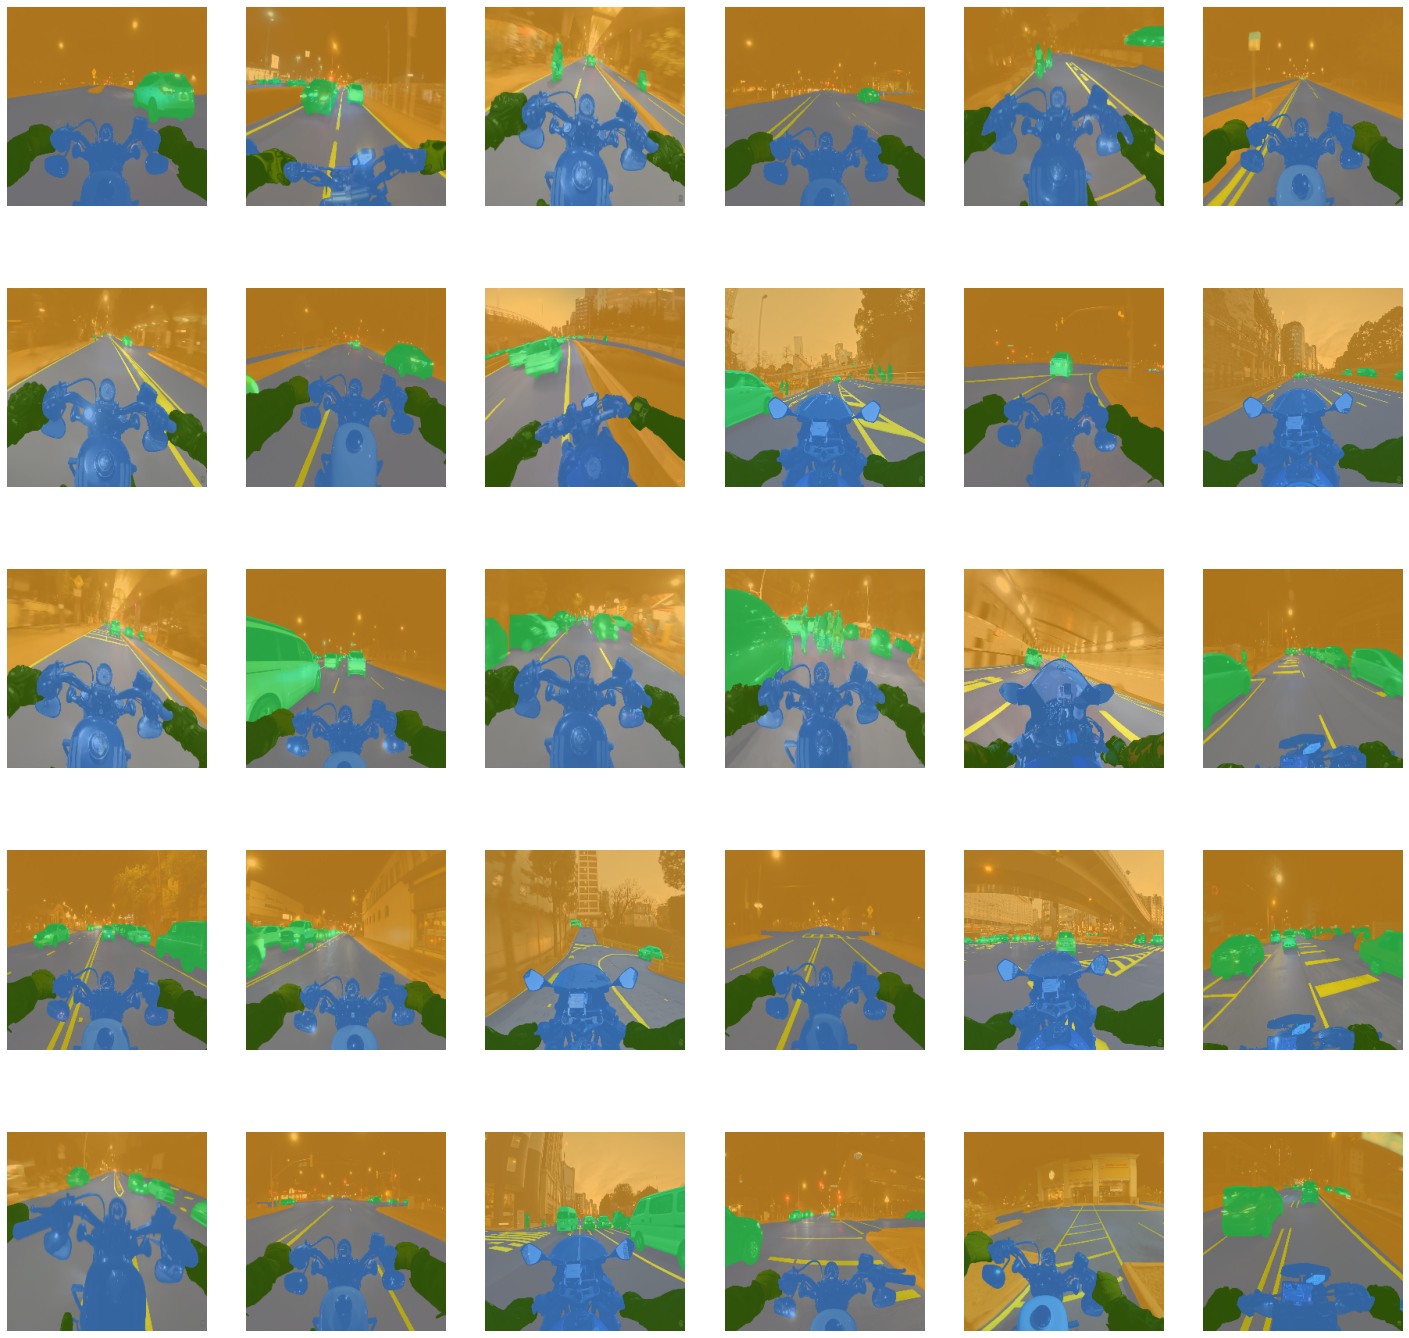

In [110]:
display_images_with_labels(train_images, train_labels)

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, UpSampling2D, Concatenate

# Sequential 모델 생성
model = Sequential()

# 입력 레이어
model.add(InputLayer(input_shape=(256, 256, 3)))

# Encoder 부분
model.add(Conv2D(32, 3, activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(Conv2D(32, 3, activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(MaxPooling2D())

model.add(Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(MaxPooling2D())

# Encoding Layer
model.add(Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal'))

# Decoder 부분
model.add(UpSampling2D())
model.add(Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal'))

model.add(UpSampling2D())
model.add(Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal'))

model.add(UpSampling2D())
model.add(Conv2D(32, 3, activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(Conv2D(32, 3, activation='relu', padding='same', kernel_initializer='he_normal'))

# 출력 레이어
model.add(Conv2D(3, 1, activation='sigmoid', padding='same'))

# 모델 요약
model.summary()

# Compile Model
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_189 (Conv2D)          (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_190 (Conv2D)          (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_191 (Conv2D)          (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_192 (Conv2D)          (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_193 (Conv2D)          (None, 64, 64, 128)      

In [148]:
plot_model(model, "U-Net.png", show_shapes=True)
log_dir = "logs/"  # 로그 디렉토리 경로

In [150]:
callbacks = [
    ModelCheckpoint("UNet", save_best_only=True),
    TensorBoard(log_dir=log_dir)
]

In [152]:
steps_per_epoch = len(train_images) // batch_size
validation_steps = len(test_images) // batch_size

history = model.fit(
    train_datagen,
    validation_data=test_datagen,
    epochs=50,
    batch_size = 32,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks = callbacks
)

Epoch 1/50
4/4 [==============================] - 5s 998ms/step - loss: 0.6850 - accuracy: 0.3836 - val_loss: 0.6338 - val_accuracy: 0.5996
INFO:tensorflow:Assets written to: UNet/assets


INFO:tensorflow:Assets written to: UNet/assets


Epoch 2/50
4/4 [==============================] - 3s 629ms/step - loss: 0.6374 - accuracy: 0.6742 - val_loss: 0.6327 - val_accuracy: 0.7046
INFO:tensorflow:Assets written to: UNet/assets


INFO:tensorflow:Assets written to: UNet/assets


Epoch 3/50
4/4 [==============================] - 3s 650ms/step - loss: 0.6279 - accuracy: 0.6203 - val_loss: 0.6261 - val_accuracy: 0.5787
INFO:tensorflow:Assets written to: UNet/assets


INFO:tensorflow:Assets written to: UNet/assets


Epoch 4/50
4/4 [==============================] - 3s 619ms/step - loss: 0.6202 - accuracy: 0.6222 - val_loss: 0.6235 - val_accuracy: 0.4928
INFO:tensorflow:Assets written to: UNet/assets


INFO:tensorflow:Assets written to: UNet/assets


Epoch 5/50
4/4 [==============================] - 3s 623ms/step - loss: 0.6195 - accuracy: 0.5314 - val_loss: 0.6174 - val_accuracy: 0.5298
INFO:tensorflow:Assets written to: UNet/assets


INFO:tensorflow:Assets written to: UNet/assets


Epoch 6/50
4/4 [==============================] - 3s 634ms/step - loss: 0.6145 - accuracy: 0.5214 - val_loss: 0.6205 - val_accuracy: 0.5421
Epoch 7/50
4/4 [==============================] - 3s 658ms/step - loss: 0.6112 - accuracy: 0.5685 - val_loss: 0.6160 - val_accuracy: 0.5173
INFO:tensorflow:Assets written to: UNet/assets


INFO:tensorflow:Assets written to: UNet/assets


Epoch 8/50
4/4 [==============================] - 3s 659ms/step - loss: 0.6105 - accuracy: 0.5265 - val_loss: 0.6180 - val_accuracy: 0.5109
Epoch 9/50
4/4 [==============================] - 3s 654ms/step - loss: 0.6094 - accuracy: 0.5413 - val_loss: 0.6167 - val_accuracy: 0.4624
Epoch 10/50
4/4 [==============================] - 3s 666ms/step - loss: 0.6093 - accuracy: 0.4983 - val_loss: 0.6129 - val_accuracy: 0.5224
INFO:tensorflow:Assets written to: UNet/assets


INFO:tensorflow:Assets written to: UNet/assets


Epoch 11/50
4/4 [==============================] - 3s 656ms/step - loss: 0.6054 - accuracy: 0.5154 - val_loss: 0.6134 - val_accuracy: 0.4859
Epoch 12/50
4/4 [==============================] - 3s 671ms/step - loss: 0.6051 - accuracy: 0.5207 - val_loss: 0.6139 - val_accuracy: 0.4982
Epoch 13/50
4/4 [==============================] - 3s 672ms/step - loss: 0.6134 - accuracy: 0.5052 - val_loss: 0.6175 - val_accuracy: 0.5449
Epoch 14/50
4/4 [==============================] - 3s 641ms/step - loss: 0.6057 - accuracy: 0.5398 - val_loss: 0.6089 - val_accuracy: 0.4945
INFO:tensorflow:Assets written to: UNet/assets


INFO:tensorflow:Assets written to: UNet/assets


Epoch 15/50
4/4 [==============================] - 3s 641ms/step - loss: 0.6045 - accuracy: 0.5359 - val_loss: 0.6064 - val_accuracy: 0.5579
INFO:tensorflow:Assets written to: UNet/assets


INFO:tensorflow:Assets written to: UNet/assets


Epoch 16/50
4/4 [==============================] - 3s 633ms/step - loss: 0.6058 - accuracy: 0.5590 - val_loss: 0.6092 - val_accuracy: 0.5245
Epoch 17/50
4/4 [==============================] - 3s 636ms/step - loss: 0.6015 - accuracy: 0.5677 - val_loss: 0.6089 - val_accuracy: 0.5620
Epoch 18/50
4/4 [==============================] - 3s 645ms/step - loss: 0.6005 - accuracy: 0.5922 - val_loss: 0.6037 - val_accuracy: 0.5981
INFO:tensorflow:Assets written to: UNet/assets


INFO:tensorflow:Assets written to: UNet/assets


Epoch 19/50
4/4 [==============================] - 3s 617ms/step - loss: 0.5998 - accuracy: 0.5994 - val_loss: 0.6033 - val_accuracy: 0.5994
INFO:tensorflow:Assets written to: UNet/assets


INFO:tensorflow:Assets written to: UNet/assets


Epoch 20/50
4/4 [==============================] - 3s 627ms/step - loss: 0.5981 - accuracy: 0.6216 - val_loss: 0.6100 - val_accuracy: 0.5381
Epoch 21/50
4/4 [==============================] - 3s 652ms/step - loss: 0.6004 - accuracy: 0.5688 - val_loss: 0.6054 - val_accuracy: 0.5662
Epoch 22/50
4/4 [==============================] - 3s 646ms/step - loss: 0.5982 - accuracy: 0.5901 - val_loss: 0.6040 - val_accuracy: 0.5617
Epoch 23/50
4/4 [==============================] - 3s 622ms/step - loss: 0.5984 - accuracy: 0.5991 - val_loss: 0.6080 - val_accuracy: 0.5875
Epoch 24/50
4/4 [==============================] - 3s 648ms/step - loss: 0.5973 - accuracy: 0.6102 - val_loss: 0.6060 - val_accuracy: 0.5655
Epoch 25/50
4/4 [==============================] - 3s 672ms/step - loss: 0.5941 - accuracy: 0.5919 - val_loss: 0.6085 - val_accuracy: 0.5912
Epoch 26/50
4/4 [==============================] - 3s 636ms/step - loss: 0.5955 - accuracy: 0.6259 - val_loss: 0.6066 - val_accuracy: 0.5630
Epoch 27/50
4

INFO:tensorflow:Assets written to: UNet/assets


Epoch 28/50
4/4 [==============================] - 3s 631ms/step - loss: 0.5958 - accuracy: 0.6088 - val_loss: 0.6046 - val_accuracy: 0.5966
Epoch 29/50
4/4 [==============================] - 3s 662ms/step - loss: 0.5949 - accuracy: 0.6188 - val_loss: 0.6090 - val_accuracy: 0.6201
Epoch 30/50
4/4 [==============================] - 3s 648ms/step - loss: 0.5989 - accuracy: 0.6151 - val_loss: 0.6033 - val_accuracy: 0.5690
Epoch 31/50
4/4 [==============================] - 3s 639ms/step - loss: 0.5959 - accuracy: 0.5733 - val_loss: 0.6166 - val_accuracy: 0.6027
Epoch 32/50
4/4 [==============================] - 3s 622ms/step - loss: 0.5979 - accuracy: 0.6185 - val_loss: 0.6006 - val_accuracy: 0.6186
INFO:tensorflow:Assets written to: UNet/assets


INFO:tensorflow:Assets written to: UNet/assets


Epoch 33/50
4/4 [==============================] - 3s 627ms/step - loss: 0.5971 - accuracy: 0.6058 - val_loss: 0.6048 - val_accuracy: 0.5779
Epoch 34/50
4/4 [==============================] - 3s 655ms/step - loss: 0.5945 - accuracy: 0.6196 - val_loss: 0.5989 - val_accuracy: 0.6223
INFO:tensorflow:Assets written to: UNet/assets


INFO:tensorflow:Assets written to: UNet/assets


Epoch 35/50
4/4 [==============================] - 3s 614ms/step - loss: 0.5949 - accuracy: 0.6263 - val_loss: 0.6038 - val_accuracy: 0.6176
Epoch 36/50
4/4 [==============================] - 3s 663ms/step - loss: 0.5947 - accuracy: 0.6104 - val_loss: 0.6040 - val_accuracy: 0.5699
Epoch 37/50
4/4 [==============================] - 3s 652ms/step - loss: 0.5926 - accuracy: 0.6104 - val_loss: 0.5996 - val_accuracy: 0.6361
Epoch 38/50
4/4 [==============================] - 3s 660ms/step - loss: 0.5931 - accuracy: 0.6382 - val_loss: 0.6045 - val_accuracy: 0.5706
Epoch 39/50
4/4 [==============================] - 3s 637ms/step - loss: 0.5910 - accuracy: 0.6085 - val_loss: 0.6009 - val_accuracy: 0.5780
Epoch 40/50
4/4 [==============================] - 3s 618ms/step - loss: 0.5917 - accuracy: 0.6401 - val_loss: 0.6048 - val_accuracy: 0.6212
Epoch 41/50
4/4 [==============================] - 3s 642ms/step - loss: 0.5910 - accuracy: 0.6268 - val_loss: 0.6015 - val_accuracy: 0.6429
Epoch 42/50
4

INFO:tensorflow:Assets written to: UNet/assets


Epoch 49/50
4/4 [==============================] - 3s 668ms/step - loss: 0.5931 - accuracy: 0.6124 - val_loss: 0.6005 - val_accuracy: 0.6250
Epoch 50/50
4/4 [==============================] - 3s 647ms/step - loss: 0.5928 - accuracy: 0.6337 - val_loss: 0.6015 - val_accuracy: 0.6424


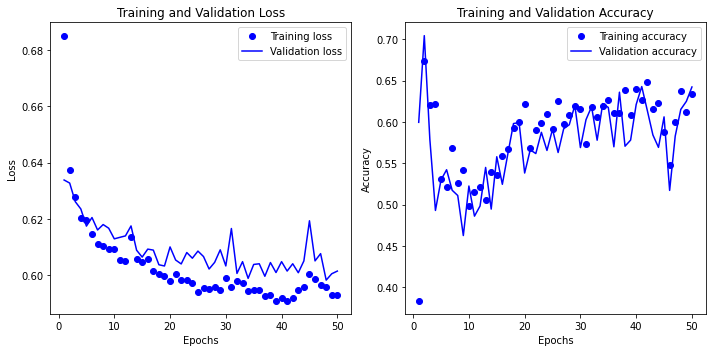

In [162]:
import matplotlib.pyplot as plt

# 훈련 및 검증 손실 그래프
loss = history.history['loss']
val_loss = history.history['val_loss']

# 훈련 및 검증 정확도 그래프
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

# 손실 그래프
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [157]:
model = keras.models.load_model("UNet")
model.evaluate(test_images)
prediction = model.predict(test_images)

2/2 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


In [160]:
def show_images_and_predictions(test_images, predictions, test_labels, num_images=10):
    for i in range(num_images):
        plt.figure(figsize=(10, 8))
        plt.subplot(1, 3, 1)
        plt.imshow(test_images[i])
        plt.title("Original")
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(test_labels[i])
        plt.title("Original Mask")
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(predictions[i])
        plt.title("Predicted Mask")
        plt.axis('off')

        plt.tight_layout()
        plt.show()


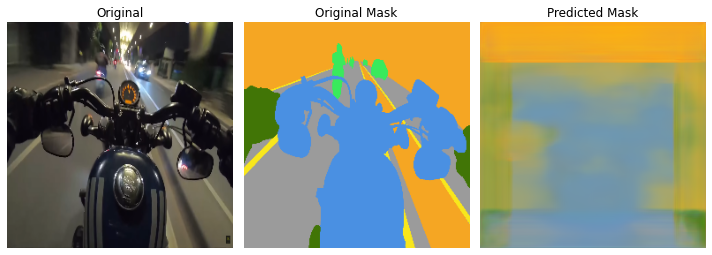

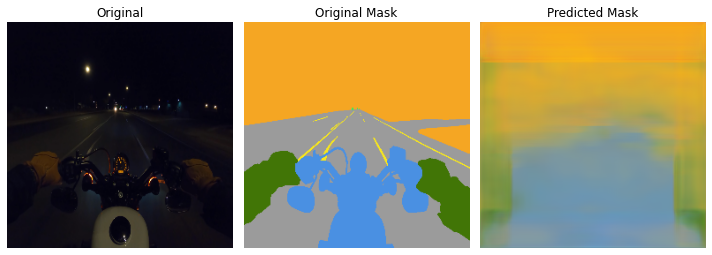

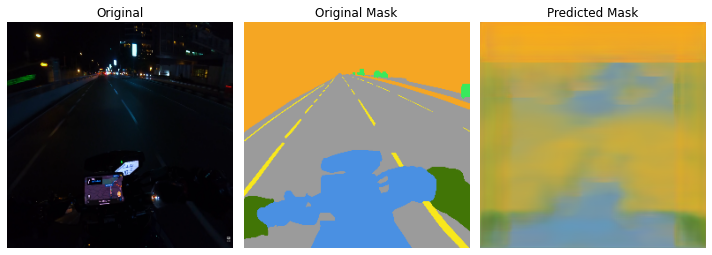

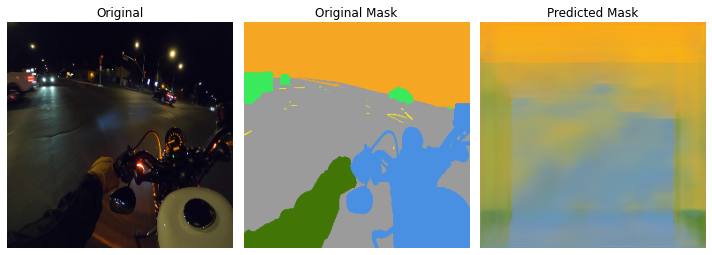

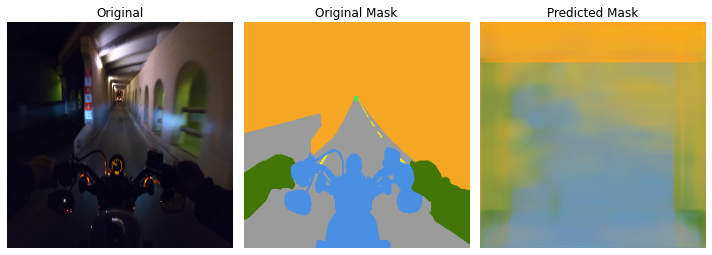

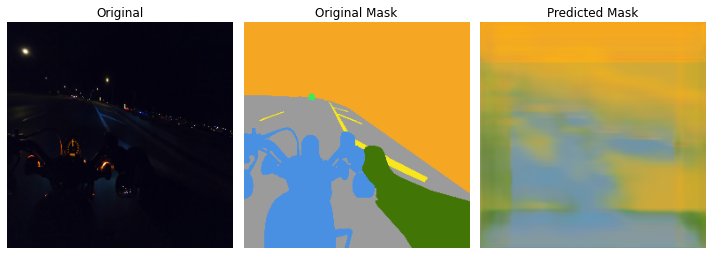

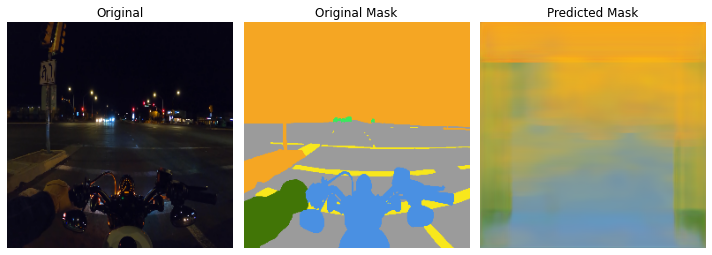

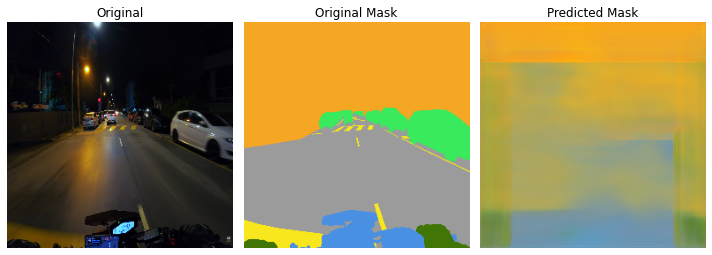

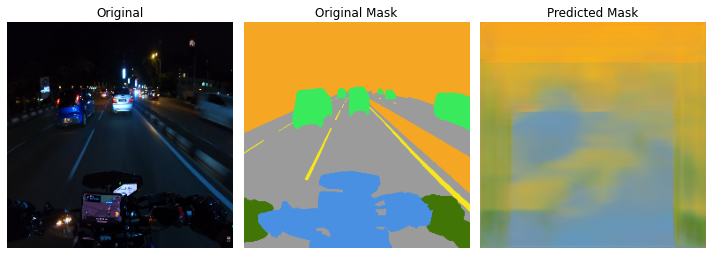

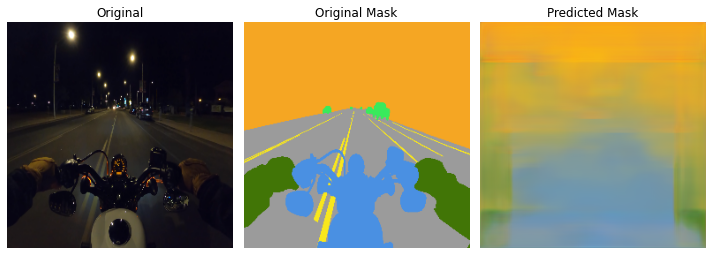

In [161]:
# 첫 10개 이미지 및 예측 결과 시각화
show_images_and_predictions(test_images[:10], prediction[:10], test_labels[:10], num_images=10)